In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_01_Aug_2019.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
# It will print the type of value of each column
long_time = test_new.correct_longtime
print(type(long_time))
string_time = test_new.stringTime
print(type(string_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [19]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
# test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [20]:
# making dateTime column as a index for the test_new panda dataframe
# test_new = test_new.set_index('dateTime')

In [21]:
test_new.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime,dateTime
0,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52,1555311120,2019-04-15 08:52:00
1,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51,1555311060,2019-04-15 08:51:00
2,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50,1555311000,2019-04-15 08:50:00
3,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49,1555310940,2019-04-15 08:49:00
4,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48,1555310880,2019-04-15 08:48:00


In [ ]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

#RWDAKRWRS8V0
# 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

print(type(multivariate_column_label))

In [ ]:
size_column = len(multivariate_column_label)
print(size_column)

In [22]:
# multivariate_data=test_new.iloc[0:25000][multivariate_column_label]
multivariate_data=test_new.iloc[0:25000][:]
multivariate_data=multivariate_data.loc[::-1]
multivariate_data.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime,dateTime
24999,Row24999,1552270440000,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,2019-03-11 03:14,1552270440,2019-03-11 03:14:00
24998,Row24998,1552270500000,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,2019-03-11 03:15,1552270500,2019-03-11 03:15:00
24997,Row24997,1552270560000,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,2019-03-11 03:16,1552270560,2019-03-11 03:16:00
24996,Row24996,1552270620000,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,2019-03-11 03:17,1552270620,2019-03-11 03:17:00
24995,Row24995,1552270680000,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,2019-03-11 03:18,1552270680,2019-03-11 03:18:00


In [23]:
# function for changing column order. pass dataframe, column name, which order you want to set for the column
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

multivariate_data_1 = change_column_order(multivariate_data,'AEWIHO_T9AV2',-1)
multivariate_data_2 = change_column_order(multivariate_data_1,'dateTime',0)

In [24]:
multivariate_data_drop = multivariate_data_2.drop([multivariate_data_2.columns[1],multivariate_data_2.columns[2],
                                                  multivariate_data_2.columns[-3],multivariate_data_2.columns[-2]], axis=1)

In [25]:
multivariate_data_drop.columns.get_loc("AEWIHO_T9AV2")

4218

In [26]:
multivariate_data_drop.columns[-1]

'AEWIHO_T9AV2'

In [27]:
multivariate_data_drop.tail()

,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
4,2019-04-15 08:48:00,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,58.697162,...,82.078296,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,78.780987
3,2019-04-15 08:49:00,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,58.231774,...,82.074011,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,78.450988
2,2019-04-15 08:50:00,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,58.231774,...,82.098144,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,78.361331
1,2019-04-15 08:51:00,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,58.231774,...,82.082055,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,78.222914
0,2019-04-15 08:52:00,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,57.766387,...,92.632593,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,78.101485


In [28]:
multivariate_data_drop.loc[4]['AEAGHOAWE2T1']

72.54901960784316

In [29]:
multivariate_data_drop_dummy = multivariate_data_drop.set_index('dateTime')

In [30]:
multivariate_data_drop_dummy.head()

,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,60.849423,100.000000,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,79.178306
2019-03-11 03:15:00,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,60.849423,83.088535,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,81.659117
2019-03-11 03:16:00,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,60.384036,95.667996,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,86.055430
2019-03-11 03:17:00,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,60.384036,93.447307,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,87.113691
2019-03-11 03:18:00,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,60.384036,76.483634,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,87.266264


In [ ]:
s.describe()

In [ ]:
multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [ ]:
# checking column type
s = multivariate_data['dateTime_column'].dtype
print(s)

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [ ]:
tr['Date'] = multivariate_data['dateTime_column'].dt.strftime('%d/%m/%Y')
tr['Time'] = multivariate_data['dateTime_column'].dt.strftime('%H:%M:%S')

date_type = tr['Date'].dtype
time_type = tr['Time'].dtype
print('date_type: ', date_type)
print('time_type: ',time_type)

In [ ]:
# converting previously created date and time column to datetime type
tr['Date'] = pd.to_datetime(tr['Date'])
tr['Time'] = pd.to_datetime(tr['Time'])

date_type = tr['Date'].dtype
time_type = tr['Time'].dtype

print("to observe the difference look in the previous cell's output")
print('date_type: ', date_type)
print('time_type: ',time_type)

In [ ]:
e1 = tr['Date'].dtype
print(type(e1))

In [ ]:
# it will return a column with weekday name
tr['Weekday_name'] = tr.index.weekday_name

In [ ]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [ ]:
tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [ ]:
# make all the time(without date) to numeric value
tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [ ]:
tr.head()

In [ ]:
tr.columns

In [ ]:
pr_1.head()

In [ ]:
my_array=[]
count = 0

for index_2, value_2 in tr.iterrows():
    for i_2 , v_2 in enumerate(value_2):
        if i_2 == 12 and v_2 != 0.0:
#             print(v_2)
            v_2_split = v_2.split('/')
            if v_2_split[0] == '11' and v_2_split[1]=='03' :
                my_array = np.append(my_array,index_2)
#                 print(v_2)
#                 print(count)
            
                count+=1
# print('-------',count)
print(len(my_array))

In [ ]:
tr_33 = tr.reset_index()

In [ ]:
df2 = pd.DataFrame()
for idx , v_2 in enumerate(tr_33['Date']):
#     print(idx)
    if v_2 != 0.0:
        v_2_split = v_2.split('/')
        if v_2_split[0] == '11' and v_2_split[1]=='03':
            required_dataframe = pd.DataFrame(tr_33.iloc[idx:(idx+1),:], columns=tr_33.columns)
            df2 = pd.concat([df2, required_dataframe], axis=0)

In [ ]:
df2.head()

In [ ]:
vvv = tr.groupby('TypeofDAY')
vvv.head(1)

tr['AEWIHO_T9AV2'].describe()

In [ ]:
dict_of_day_type = {k:v for k,v in tr.groupby('TypeofDAY')}
# plt.ioff()
key_value = collections.OrderedDict(dict_of_day_type)

for k_1 in key_value:
    print(k_1)
    my_week = dict_of_day_type[k_1]
    my_week.iloc[:].plot(y=['AEWIHO_T9AV2'])
    describe = my_week['AEWIHO_T9AV2'].describe()
    RMSE = 2
    textstr = 'describe=%.2f\nRMSE=%.2f\n'%(1, 2)
    plt.text(0.5, 0.5, textstr, fontsize=14)
    plt.savefig(path_1+str(k_1)+'_'+'.jpg')
#     plt.close()

In [ ]:
dict_of_dates = {k: v for k, v in tr.groupby('Date')}

import collections
prices  = collections.OrderedDict(dict_of_dates)

path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

for k in prices:
    k_sp = k.replace('/','_')
    my_f = dict_of_dates[k]
    my_f.iloc[:].plot(y=['AEWIHO_T9AV2'])
    plt.savefig(path_1+str(k_sp)+'_'+'date.jpg')
    plt.ioff()
#     print(my_f.iloc[:]['AEWIHO_T9AV2'])
    
    

In [ ]:
# e = 'weekend'
# print(type(e))
# for index_1, value_1 in tr.iterrows():
#     for i_1 , v_1 in enumerate(value_1):
#         if i_1 == 13 and v_1 == e:
#             d = tr.index.get_loc(index_1) #It will give the row value for the corresponding index of the dataframe
# #             print(tr.iloc[d]['Weekday_name'])
#             print(index_1)

In [ ]:
dict_of_dates = {k: v for k, v in tr.groupby('Date')}

import collections
prices  = collections.OrderedDict(dict_of_dates)

# path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

for k in prices:
    k_sp = k.replace('/','_')
    print(k,'\t',k_sp)

# import pprint
# pprint.pprint(dict_of_dates)

In [ ]:
# tr_group = tr.groupby(pd.Grouper(freq='1Y')).sum()
# tr_group.head()

tr_1 = tr['2019-03-11':'2019-03-11']
tr_1.tail()
print(len(tr_1))

In [ ]:
morning_shift = tr_1.between_time('06:00', '14:00')
day_shift = tr.between_time('14:01', '22:00')
night_shift = tr.between_time('22:01', '05:59')

In [ ]:
len(morning_shift)

In [ ]:
def change_dataframe(dataframe):
    present_data = dataframe
    return present_data
present_data = change_dataframe(tr)

In [ ]:
type(pr_1)

In [ ]:
# present_data.plot(y=present_data.columns['AEWIHO_T9AV2'])

In [ ]:
pr_1 = present_data.drop(multivariate_column_label[0], axis=1)

In [ ]:
pr_1.head()

In [ ]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in pr_1.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

In [ ]:
if zero_index.size > 0:
    pr_1_modify = pr_1.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    pr_1_modify = pr_1

In [ ]:
cols = [-1,-2,-3,-4,-5,-6,-7]
pr_1_modify_drop = pr_1_modify.drop(pr_1_modify.columns[cols], axis=1)

In [ ]:
pr_1_modify_drop.head()

In [ ]:
multivariate_data_modify = pr_1_modify_drop

from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
print(multivariate_data_modify.shape)
print(multivariate_data_drop_zero.shape)

In [ ]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

print('shape of multivariate_data_drop_zero_resample: ', multivariate_data_drop_zero_resample.shape)
print('shape of multivariate_data_drop_zero_interpolate: ',multivariate_data_drop_zero_interpolate.shape)

In [ ]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+2
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


In [ ]:
print('shape of drop_consecutive_same_value_zero: ', drop_consecutive_same_value_zero.shape)
print('shape of drop_consecutive_same_value_interpolate: ', drop_consecutive_same_value_interpolate.shape)

In [ ]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [ ]:
new_dataframe.head()

In [ ]:
# start = 0
# end = 300

# loop = int(len(new_dataframe)/300)+1
# path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/fig_target_night/'

# for i in range(loop):
#     if end < len(new_dataframe):
        
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        
#         plt.savefig(path+str(start)+'_night.jpg')
#         start = end
#         end = end+300
#     else:
#         start = start
#         end = len(new_dataframe)
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
#         plt.savefig(path+'final_'+str(len(new_dataframe))+'_night.jpg')
        
# #     plt.rcParams['figure.figsize'] =(20,10)

In [ ]:
new_dataframe.iloc[0:].plot(y = new_dataframe.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(20,20)

In [ ]:
dateRange = pd.date_range(new_dataframe.index[0],new_dataframe.index[10], freq='1min')
print(dateRange)
plt.plot(dateRange,new_dataframe.iloc[0:11,-1])
plt.xlim(dateRange[0],dateRange[-1])
plt.xticks(rotation=25)

In [ ]:
dateRange[-1]

In [ ]:
# start_1 = 700
# end_1 = start_1+300
# new_dataframe.iloc[start_1:end_1].plot(x = new_dataframe.index.format(), y=new_dataframe.columns[-1])
plt.plot(new_dataframe.iloc[0:100].index.format(), new_dataframe.iloc[0:100,-1])
plt.show()

In [ ]:
print(max(new_dataframe.iloc[start_1:end_1][new_dataframe.columns[-1]]))

print(len(new_dataframe))

In [ ]:
test_new.iloc[0:2000].plot(y=new_dataframe.columns[-1])

In [ ]:
new_dataframe.plot(y=new_dataframe.columns[-1])

In [ ]:
dataset = np.array(multivariate_data_drop_dummy)

In [ ]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.95)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
train_model=LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
print(train_model)

predicted_output=train_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [ ]:
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)))
plt.scatter(test_output,predicted_output, color = 'blue')

In [31]:
correlation = multivariate_data_drop_dummy.corr()

In [32]:
correlation.shape

(4218, 4218)

# below cell is using for saving csv file containing information of correlation

In [33]:
correlation.to_csv('correlation_file')

In [ ]:
# to display correlation dataframe
# correlation

In [34]:
# changing the index value to numerical value
correlation_reset = correlation.reset_index()

In [ ]:
# correlation_reset

In [71]:
# fucntion for making an array where all the column will be included who has a larger correlation value
# than a given threshold. here finally the array will also contain the target column and this array will be used
# finally to make a new dataframe


def fetch_high_correlative_column(dataframe,target_column,correlation_threshold_value):
    high_correlated_array_with_target = []
    for index_corr_reset, val_corr_reset in enumerate(dataframe[target_column]):
        if val_corr_reset > correlation_threshold_value and val_corr_reset < 0.6:
            required_column = dataframe.loc[index_corr_reset]['index']
            if required_column != target:
#                 print(required_column)
                high_correlated_array_with_target = np.append(high_correlated_array_with_target,required_column)
            else:
                pass
#                 print('hey stop !! target came whose name is',required_column,' and corr value is: ', val_corr_reset)
    final_array = np.append(high_correlated_array_with_target,target_column)
    return final_array
correlation_threshold_value = 0.5
my_target = multivariate_data_drop_dummy.columns[-1] # here declaring who is target column.
final_array_with_correlation = fetch_high_correlative_column(correlation_reset, my_target, correlation_threshold_value)
len(final_array_with_correlation)

13

In [72]:
# making new dataframe using the column which came from the high correlated array

new_frame = multivariate_data_drop_dummy.iloc[:][final_array_with_correlation]

In [73]:
print('length of new_frame: ', len(new_frame))
new_frame.head()

length of new_frame:  25000


,RWDAHOBG9_V0,AEDAHO_T9_V2,RWDATZ_HO_V1,RWWIHOBK__V0,RWWIHOBM__P0,RWWIHOBK__T0,RWWIHOB_MWT0,RWWIHOB_HWT0,AEWIHOBK__V0,RWWIHOBT9_V0,RWWIHOTSUMV0,RWWIHO_VERV0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,
2019-03-11 03:14:00,83.841293,83.327361,50.619761,90.174924,89.530585,90.308474,96.594824,94.076290,90.203446,89.360315,67.050713,75.017129,79.178306
2019-03-11 03:15:00,84.832219,84.314814,51.100140,87.419352,88.903326,90.430027,96.529931,94.003521,87.547348,89.534879,67.904313,74.995147,81.659117
2019-03-11 03:16:00,84.835578,84.380943,51.167150,88.714296,87.689595,90.293459,96.404936,93.851567,88.713878,89.591742,69.482925,75.118191,86.055430
2019-03-11 03:17:00,83.749498,83.279853,50.420753,89.575937,86.516399,89.981116,96.295169,93.727603,89.571878,86.591937,69.763910,74.112424,87.113691
2019-03-11 03:18:00,80.270870,79.963124,48.254525,89.979461,86.516399,90.053752,96.264723,93.643636,90.012906,88.387287,69.927938,74.680827,87.266264


In [ ]:
new_frame_1 = new_frame.drop(['RWWIHOAG9_V0','RWWIHOBG8_V0'], axis=1)

In [74]:
dataset = np.array(new_frame)

def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.98)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  24500
dataset length:  25000
train_input shape:  (24500, 12)
train_output shape:  (24500,)
test_input shape:  (500, 12)
test_output shape:  (500,)


In [75]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [98]:
# train_model = LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
# train_model = ExtraTreesRegressor(n_estimators=1000, random_state=0)
train_model = GBR()
train_model.fit(train_input, train_output)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
print(train_model)
predicted_output=train_model.predict(test_input)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [100]:
# print('Slope:' ,train_model.coef_)
# print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.66
Mean_absolute_error: 2.43
Mean squared error: 67.33
RMSE:  8.205426153057918


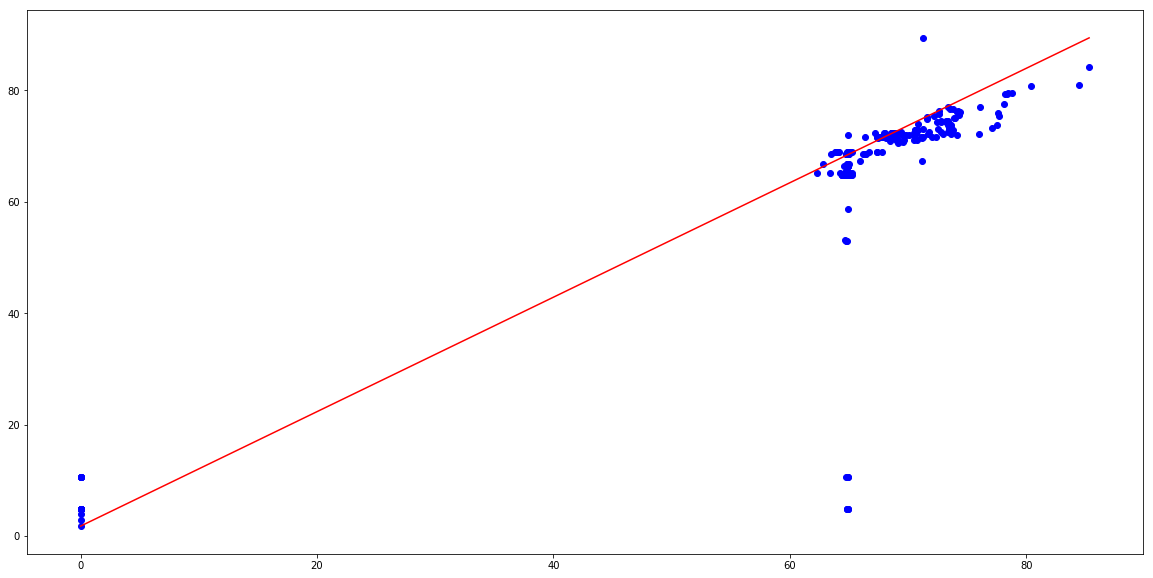

In [101]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)), color='red')
plt.scatter(test_output,predicted_output, color = 'blue')

<class 'numpy.ndarray'>


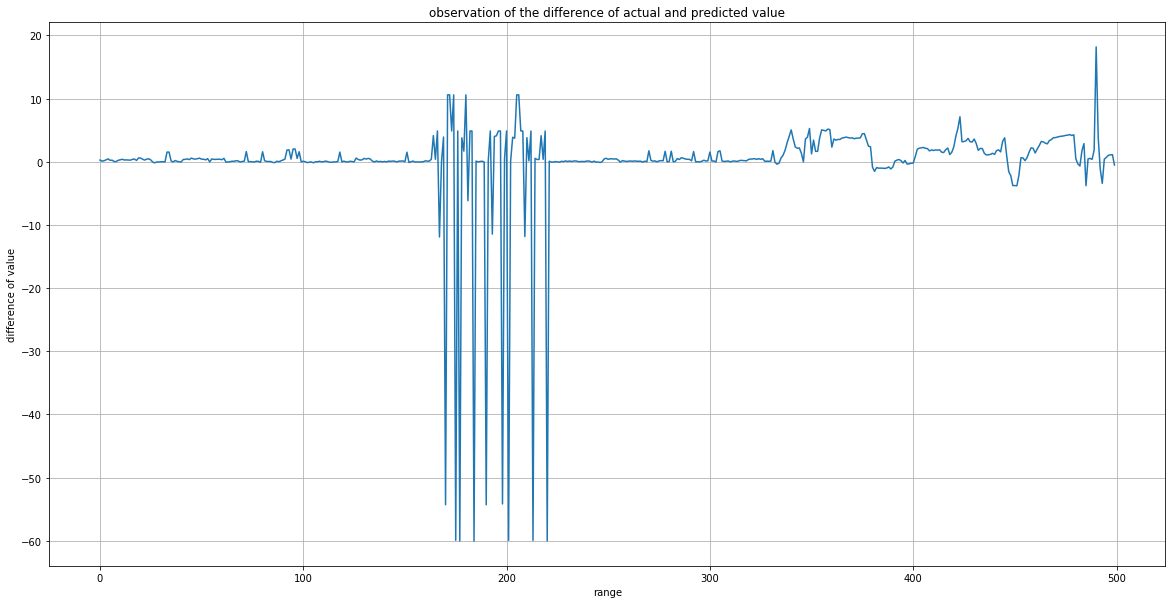

In [102]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[:])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()